In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history

import h5py
with h5py.File('galaxy_population_data_2.hdf5', 'r') as f:
    ids = f['ids'][:]
    mean_age = f['mean_age'][:]
    median_age = f['median_age'][:]
    current_SFR = f['current_SFR'][:] 
    average_SFR_0_5 = f['average_SFR_0.5'][:]
    average_SFR_1 = f['average_SFR_1'][:]
    average_SFR_2 = f['average_SFR_2'][:]
    SFR_ratio_1 = f['SFR_ratio_1'][:]
    SFR_ratio_0_5 = f['SFR_ratio_0.5'][:]
    effective_radius = f['effective_radius'][:]
    halfmass_radius = f['halfmass_radius'][:]
    mean_metallicity = f['mean_metallicity'][:]
    total_mass = f['total_mass'][:]

**Age Profiles for Rapidly Quenched Galaxies (Current SFR < 2$M_\odot$/yr & Average SFR )**

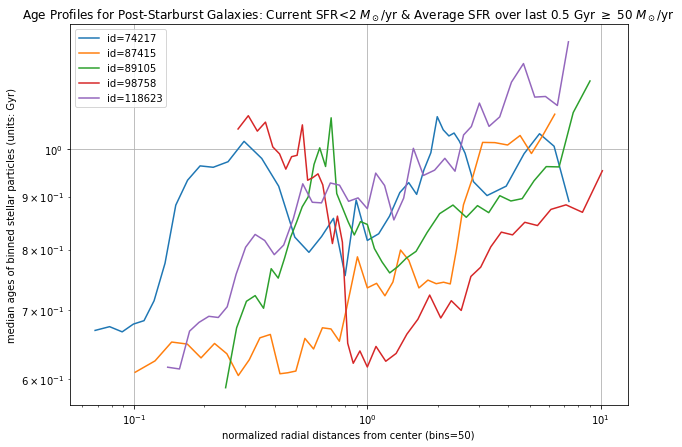

In [2]:
plt.figure(figsize=(10,7))
for id in ids[(current_SFR<2)&(average_SFR_0_5>=50)]:
    plt.plot(age_profile(id=id, redshift=2, n_bins=50)[1][4:-4], age_profile(id=id, redshift=2, n_bins=50)[0][4:-4], label='id='+str(id))
plt.legend()
plt.grid()    
plt.title('Age Profiles for Post-Starburst Galaxies: Current SFR<2 $M_\odot$/yr & Average SFR over last 0.5 Gyr $\geq$ 50 $M_\odot$/yr')
plt.xlabel('normalized radial distances from center (bins=50)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')
#The general age trend seems to be younger towards the center :)

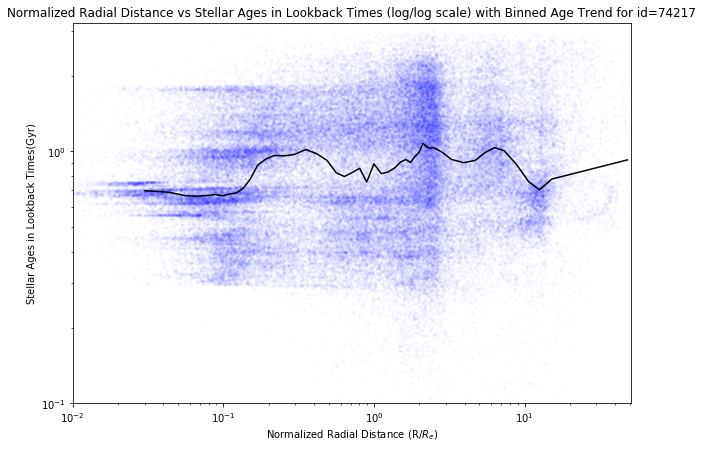

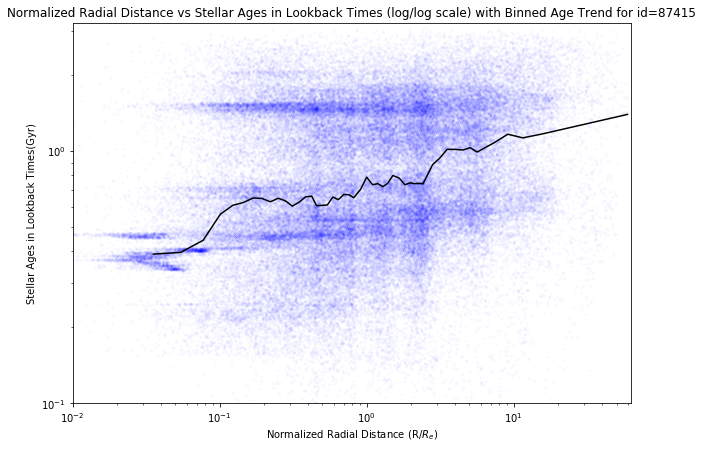

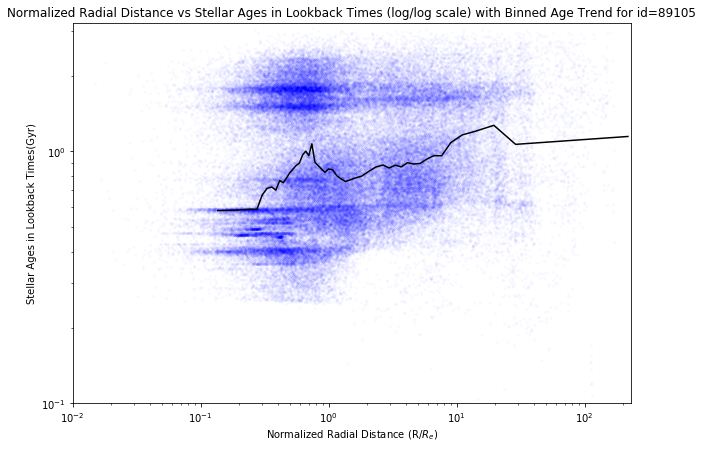

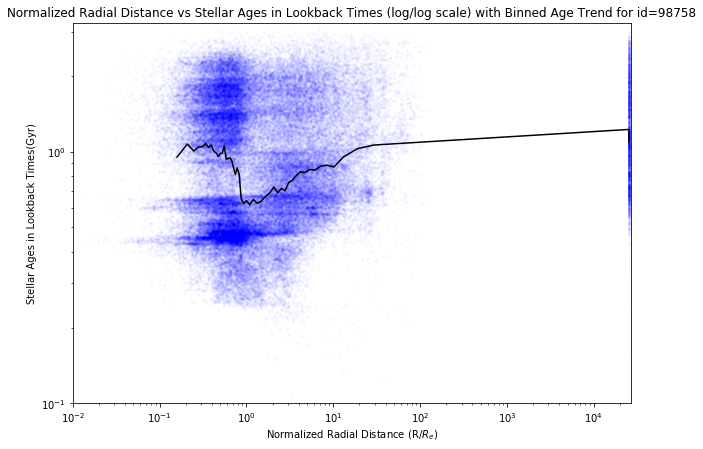

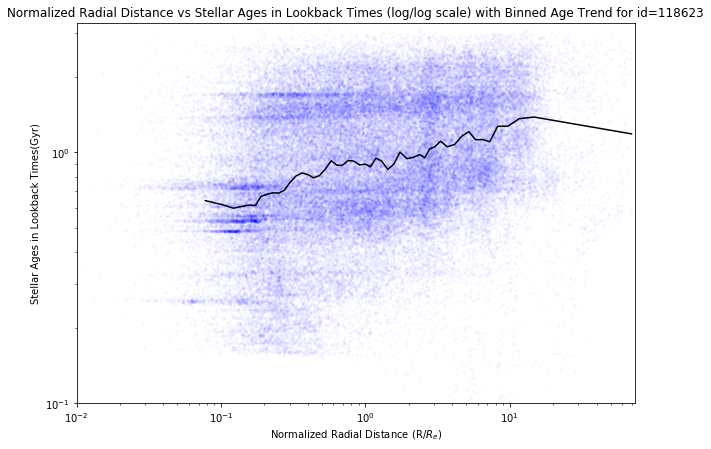

In [3]:
for id in ids[(current_SFR<2)&(average_SFR_0_5>=50)]:
    age_profile(id=id, redshift=2, n_bins=50, scatter=True)

#id=98758 might be counting a satellite galaxy
#Except id=98758, other 4 seem to have younger stellar ages towards the centers than in the outskirts

**Comparing Age Profiles for 5 Slowly Quenched and Rapidly Quenched Galaxies (Current SFR $<2$ $M_\odot$/yr):**

Slowly Quenched Galaxies  (red:  Average SFR over last $0.5$ Gyr $< 50$ $M_\odot$/yr)

Rapidly Quenched Galaxies (blue: Average SFR over last $0.5$ Gyr $\geq 50$ $M_\odot$/yr)

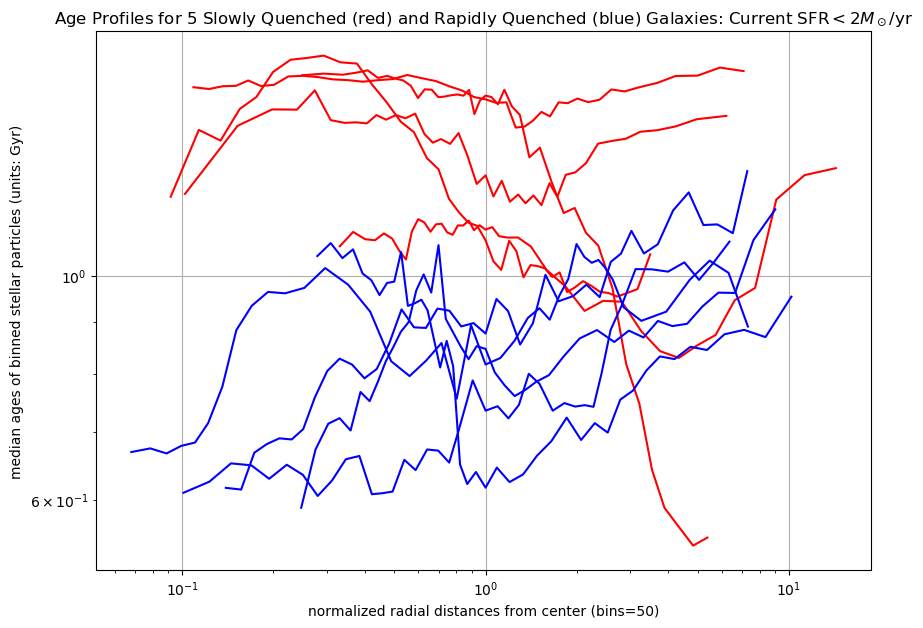

In [9]:
selection_red = ids[(current_SFR<2)&(average_SFR_0_5<50)]
selection_blue = ids[(current_SFR<2)&(average_SFR_0_5>=50)]
plt.style.use('default')
plt.figure(figsize=(10,7))
for id in np.random.choice(selection_red, 5):
    plt.plot(age_profile(id=id, redshift=2, n_bins=50)[1][4:-4], age_profile(id=id, redshift=2, n_bins=50)[0][4:-4], c='r')
#label:Slowly Quenched Galaxies(red: Average SFR over last $0.5$ Gyr $< 50$ $M_\odot$/yr)
for id in selection_blue:
    plt.plot(age_profile(id=id, redshift=2, n_bins=50)[1][4:-4], age_profile(id=id, redshift=2, n_bins=50)[0][4:-4], c='b')    
#label:Rapidly Quenched Galaxies(blue: Average SFR over last $0.5$ Gyr $\geq 50$ $M_\odot$/yr)
#plt.legend()
plt.grid()    
plt.title('Age Profiles for $5$ Slowly Quenched (red) and Rapidly Quenched (blue) Galaxies: Current SFR$<2 M_\odot$/yr')
plt.xlabel('normalized radial distances from center (bins=50)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log') 
#How to add 1 label for all blue and 1 label for all red galaxies?